# РК-2

Самойлов Константин Михайлович, ИУ5-65Б, Вариант 14

## Задание

- Дан набор данных: https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project (states_all.csv)
- Для этого набора данных необходимо построить модель классификации (регрессии).
- Необходимо использовать метод опорных векторов и градиентный бустинг.
- Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик).
- Какие метрики качества Вы использовали и почему?
- Какие выводы Вы можете сделать о качестве построенных моделей?
- Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

## Импорт зависимостей

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Первичный анализ данных

In [2]:
df = pd.read_csv("states_all.csv")

In [3]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [5]:
df.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


### Корреляционная матрица

In [6]:
df = df.drop(['PRIMARY_KEY', 'STATE', 'GRADES_KG_G'], axis=1)

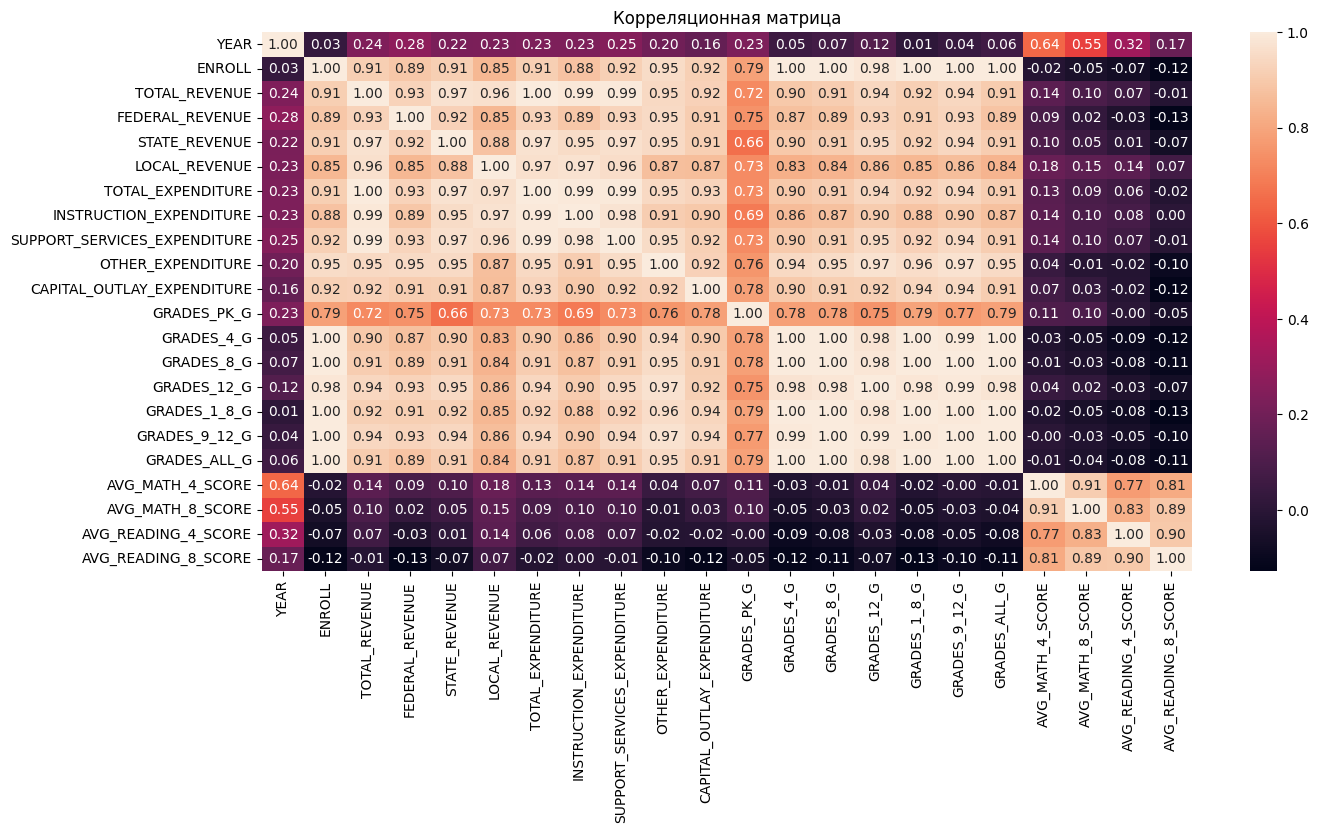

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
ax.set_title('Корреляционная матрица')
plt.show()

**Вывод**: Будем решать задачу регрессии для признака `ENROLL` (предсказание количества студентов по другим характеристикам)

## Обработка пропусков

In [8]:
df.isnull().sum()

YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [9]:
df.dropna(subset=['ENROLL'], inplace=True)
df.dropna(axis='columns', inplace=True)
df.isnull().sum()

YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_ALL_G                    0
dtype: int64

### Масштабирование признаков

In [10]:
df_scaler = MinMaxScaler()

df_columns = df.columns.to_list()
df_columns.remove('ENROLL')

for col_name in df_columns:
    df[[col_name]] = df_scaler.fit_transform(df[[col_name]])

df.head()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_ALL_G
51,0.0,727716.0,0.026611,0.029904,0.033971,0.020586,0.027721,0.029726,0.025240,0.056641,0.018754,0.108257,0.114002,0.075284,0.104476
52,0.0,121156.0,0.008177,0.014310,0.015241,0.005973,0.007600,0.005249,0.011337,0.006212,0.012054,0.011413,0.011653,0.008880,0.009022
53,0.0,676297.0,0.033378,0.028604,0.027805,0.046289,0.037038,0.030054,0.033218,0.038285,0.065364,0.108674,0.100909,0.070673,0.100579
54,0.0,311432.0,0.009929,0.009494,0.015148,0.011743,0.010542,0.011836,0.009513,0.014325,0.008336,0.060711,0.066630,0.049608,0.058970
55,0.0,5129788.0,0.310729,0.212673,0.335218,0.244007,0.325670,0.343614,0.338551,0.400805,0.189214,0.850294,0.758602,0.554017,0.825152


Выбор метрик

**Mean absolute error** - средняя абсолютная ошибка
$$MAE(y,\hat{y})=\frac{1}{N}\Sigma^{N}_{i=1}|y_i−\hat{y_i}|$$
где:

$$y\text{ - истинное значение целевого признака} $$
$$\hat{y} \text{- предсказанное значение целевого признака}$$
$$N \text{- размер тестовой выборки}$$

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции mean_absolute_error.

**Mean squared error** - средняя квадратичная ошибка
$$MSE(y,\hat{y})=\frac{1}{N}\Sigma^{N}_{i=1}(y_i−\hat{y_i})2$$
где:

$$y \text{- истинное значение целевого признака}$$
$$\hat{y} \text{- предсказанное значение целевого признака}$$
$$N \text{- размер тестовой выборки}$$
 
Вычисляется с помощью функции mean_squared_error.


**Метрика R2** или коэффициент детерминации
$$R^2(y,\hat{y} )=1− \frac{\Sigma^{N}_{i=1} (y_i - \hat{y_i^2})}{\Sigma^{N}_{i=1} (y_i - \overline{y_i^2})}$$
где:

$$y \text{ - истинное значение целевого признака}$$
$$\hat{y} \text{- предсказанное значение целевого признака}$$
$$N \text{- размер тестовой выборки}$$
$$\overline{y_i}=\frac{1}{N} \cdot \Sigma^{N}_{i=1}y_i$$
Вычисляется с помощью функции r2_score.

Метрика R2 показывает относительное отклонение предсказанных значений от реальных, в то время как MAE и MSE показывают ошибку в единицах измерения целевого признака.
Так как метрика R2 в одиночку достаточно неточная, MAE и MSE гармонично её дополняют и в совокупности дают полную картину о точности модели. 

## Разбиение датасета на обучающую и тестовую выборки

In [11]:
x_df = df.drop(columns='ENROLL')
y_df = df['ENROLL']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=73)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(918, 14) (918,)
(306, 14) (306,)


## Обучение моделей

In [12]:
svr  = SVR()
gbr = GradientBoostingRegressor()

In [13]:
svr.fit(x_train, y_train)

SVR()

In [14]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

## Получение предсказаний от моделей

In [15]:
svr_predict = svr.predict(x_test)
gbr_predict = gbr.predict(x_test)

## Оценка качества моделей

In [16]:
print('Показатели модели опорных векторов:')
print('MAE: {}, MSE: {}, R^2: {}'.format(mean_absolute_error(y_test, svr_predict), mean_squared_error(y_test, svr_predict), r2_score(y_test, svr_predict)))

Показатели модели опорных векторов:
MAE: 660856.7059728785, MSE: 1361161632730.1213, R^2: -0.06750690496151956


In [17]:
print('Показатели модели градиентного бустинга:')
print('MAE: {}, MSE: {}, R^2: {}'.format(mean_absolute_error(y_test, gbr_predict), mean_squared_error(y_test, gbr_predict), r2_score(y_test, gbr_predict)))

Показатели модели градиентного бустинга:
MAE: 21285.279273285687, MSE: 4198570830.6394324, R^2: 0.9967072217987162


## Вывод

Модели получились некачественными (большая MAE), что связанно с маленьким объёмом данных

Более точной оказалась модель **градиентного бустинга.**